# Iris

## Step 1: Preprocess the Data

In [0]:
import pandas as pd
df = pd.read_csv('iris.csv')

In [0]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
X = df.drop(columns = ['species'])
y = df['species']

In [0]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [0]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y = lb.fit_transform(y)

In [0]:
# y

In [0]:
lb.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.3,
                                                 random_state = 2020)

## Step 2: Build the NN Model

In [0]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(50,input_dim=4,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(3,activation='softmax'))

## Step 3: Compile Model

In [0]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

## Step 4: Train Model

In [0]:
history = model.fit(X_train,y_train,
                    epochs=200, 
                    validation_split = 0.3)

Train on 73 samples, validate on 32 samples
Epoch 1/200
73/73 [==============================] - 1s 10ms/step - loss: 1.2170 - acc: 0.3425 - val_loss: 1.0283 - val_acc: 0.5938
Epoch 2/200
73/73 [==============================] - 0s 148us/step - loss: 0.9473 - acc: 0.6849 - val_loss: 0.8316 - val_acc: 0.6562
Epoch 3/200
73/73 [==============================] - 0s 148us/step - loss: 0.7964 - acc: 0.6575 - val_loss: 0.7399 - val_acc: 0.6250
Epoch 4/200
73/73 [==============================] - 0s 135us/step - loss: 0.6987 - acc: 0.6575 - val_loss: 0.6692 - val_acc: 0.6250
Epoch 5/200
73/73 [==============================] - 0s 174us/step - loss: 0.6113 - acc: 0.6575 - val_loss: 0.5980 - val_acc: 0.7812
Epoch 6/200
73/73 [==============================] - 0s 135us/step - loss: 0.5277 - acc: 0.8219 - val_loss: 0.5350 - val_acc: 0.7812
Epoch 7/200
73/73 [==============================] - 0s 137us/step - loss: 0.4624 - acc: 0.8630 - val_loss: 0.4813 - val_acc: 0.8125
Epoch 8/200
73/73 [=======

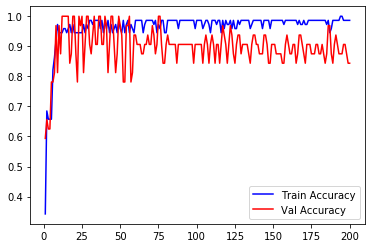

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc)+1)

plt.plot(epochs, acc,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Val Accuracy')
plt.legend()
plt.show()

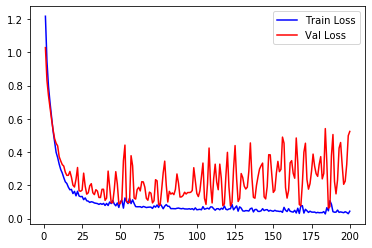

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs, loss,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Val Loss')
plt.legend()
plt.show()

## Step 5: Evaluate Model

In [0]:
loss,accuracy = model.evaluate(X_test,y_test)

45/45 [==============================] - 0s 122us/step


In [0]:
loss,accuracy

(0.0670912504907594, 0.9777777777777777)

## Step 6: Saving Model

In [0]:
model.save("iris.h5")

## Step 7: Load Model & Predict

In [0]:
from keras.models import load_model
model = load_model('iris.h5')

In [0]:
import numpy as np
y_pred = model.predict(np.array([[5.1,3.5,1.4,0.2]]))

In [0]:
y_pred

array([[9.9999905e-01, 9.6416807e-07, 1.1892851e-11]], dtype=float32)

In [0]:
y_pred.argmax()

0

# Mnist

In [0]:
# Step 1:Load the Data
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
X_train[0]

In [0]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [0]:
X_train.shape

(60000, 784)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
# Step 2: Build the Model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64,input_dim=784,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_29 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_30 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Step 3: Compile the Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
# Step 4: Train the Model
history = model.fit(X_train,y_train,
          epochs=10,
          shuffle = True,
          validation_split = 0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 5s 113us/step - loss: 0.3432 - acc: 0.9021 - val_loss: 0.1911 - val_acc: 0.9444
Epoch 2/10
42000/42000 [==============================] - 4s 88us/step - loss: 0.1535 - acc: 0.9553 - val_loss: 0.1459 - val_acc: 0.9576
Epoch 3/10
42000/42000 [==============================] - 4s 84us/step - loss: 0.1097 - acc: 0.9665 - val_loss: 0.1352 - val_acc: 0.9592
Epoch 4/10
42000/42000 [==============================] - 4s 88us/step - loss: 0.0847 - acc: 0.9741 - val_loss: 0.1242 - val_acc: 0.9633
Epoch 5/10
42000/42000 [==============================] - 4s 87us/step - loss: 0.0689 - acc: 0.9789 - val_loss: 0.1145 - val_acc: 0.9686
Epoch 6/10
42000/42000 [==============================] - 4s 87us/step - loss: 0.0563 - acc: 0.9823 - val_loss: 0.1237 - val_acc: 0.9638
Epoch 7/10
42000/42000 [==============================] - 4s 88us/step - loss: 0.0496 - acc: 0.9841 - val_loss: 0.1200 - val_ac

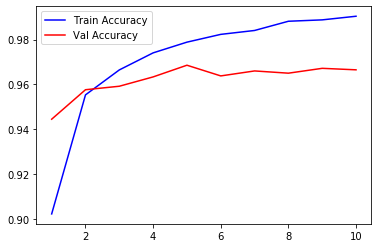

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(acc)+1)

plt.plot(epochs, acc,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Val Accuracy')
plt.legend()
plt.show()

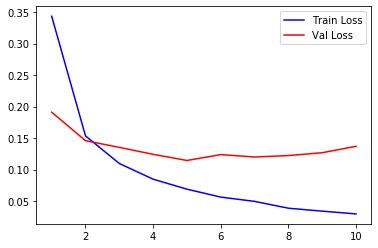

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs, loss,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Val Loss')
plt.legend()
plt.show()

In [0]:
# Step 5: Evaluate the Model
loss,accuracy = model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 30us/step


In [0]:
loss,accuracy

(0.12518571995198727, 0.9696)

In [0]:
# Step 6: Save the Model
model.save('mnist_nn.h5')

### Predict Single Image

In [0]:
import numpy as np
index = np.random.randint(1,10000)
X = X_test[[index]]

In [0]:
X.shape

(1, 784)

In [0]:
pred = model.predict(X)

In [0]:
pred

array([[3.2851634e-07, 3.4495379e-06, 2.7479869e-03, 4.2045562e-04,
        2.5672704e-12, 1.7998515e-09, 8.6203406e-11, 9.9682093e-01,
        6.9124349e-06, 1.9990608e-08]], dtype=float32)

In [0]:
pred.argmax(axis=1)

array([7])

In [0]:
import matplotlib.pyplot as plt
def show_digit(index):
    label = y_test[index].argmax(axis=0)
    image = X_test[index].reshape([28,28])
    plt.title('Actual Digit : {}'.format(label))
    plt.imshow(image, cmap='gray_r')
    plt.show()

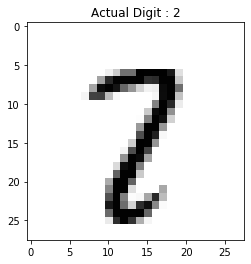

In [0]:
show_digit(index)

# Tensorboard

In [0]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64,input_dim=784,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
from keras.callbacks import TensorBoard
tb = TensorBoard(log_dir='relu',write_graph=True)

In [0]:
model.fit(X_train,y_train,
          epochs=10,
          shuffle = True,
          validation_split = 0.3,
          callbacks=[tb])

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 4s 89us/step - loss: 0.0260 - acc: 0.9918 - val_loss: 0.1401 - val_acc: 0.9672
Epoch 2/10
42000/42000 [==============================] - 4s 89us/step - loss: 0.0228 - acc: 0.9921 - val_loss: 0.1501 - val_acc: 0.9656
Epoch 3/10
42000/42000 [==============================] - 4s 84us/step - loss: 0.0199 - acc: 0.9931 - val_loss: 0.1379 - val_acc: 0.9676
Epoch 4/10
42000/42000 [==============================] - 4s 88us/step - loss: 0.0186 - acc: 0.9941 - val_loss: 0.1516 - val_acc: 0.9652
Epoch 5/10
42000/42000 [==============================] - 4s 89us/step - loss: 0.0186 - acc: 0.9935 - val_loss: 0.1521 - val_acc: 0.9671
Epoch 6/10
42000/42000 [==============================] - 4s 84us/step - loss: 0.0151 - acc: 0.9950 - val_loss: 0.1683 - val_acc: 0.9672
Epoch 7/10
42000/42000 [==============================] - 4s 84us/step - loss: 0.0144 - acc: 0.9953 - val_loss: 0.1655 - val_acc